# Prediction Using Supervised ML

## Name : Jay Patel

## Task : Predict the percentage of an student based on the no. of study hours.

In [1]:
# Import the neccesary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from the given link.

link = "http://bit.ly/w-data"

data = pd.read_csv(link)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plot the data points.

Text(0, 0.5, 'Percentage')

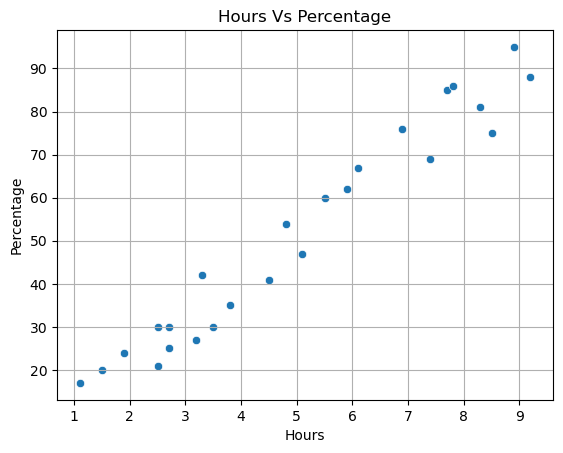

In [3]:
sns.scatterplot(x=data["Hours"], y=data["Scores"])
plt.grid()
plt.title("Hours Vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")

### Prepare the data into Dependent and Independent variable.

In [18]:
X = data[["Hours"]]

y = data["Scores"]

### Split X & y by train_test_split.

In [20]:
# Import the library.

from sklearn.model_selection import train_test_split

In [21]:
# Split the data into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Print the shape of train and test data.

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### Train the Model.

In [23]:
# Import the library.

from sklearn.linear_model import LinearRegression

# Create an object.

lr_model = LinearRegression()

# Fit the model.

lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
print("Coefficient : ", lr_model.coef_)

Coefficient :  [9.68207815]


In [25]:
print("Intercept : ", lr_model.intercept_)

Intercept :  2.826892353899737


### Plot best fit line for train data.

In [26]:
# Create best fit line.

best_fit_line = lr_model.coef_ * X + lr_model.intercept_

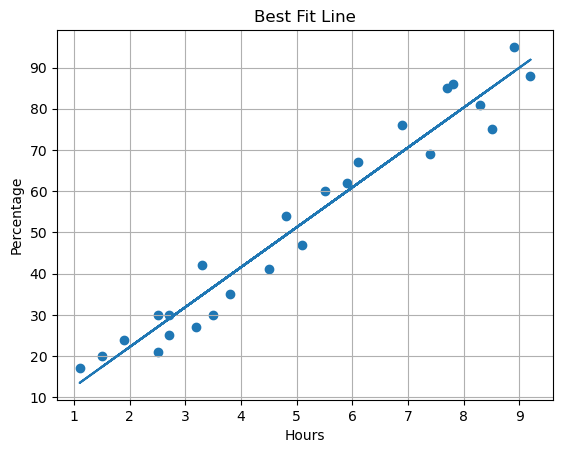

In [27]:
# Plot best fit line.

plt.scatter(x=X, y=y)
plt.plot(X, best_fit_line)
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.title("Best Fit Line")
plt.grid()
plt.show()

### Prediction for test data.

In [28]:
y_pred = lr_model.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [29]:
# Comparing Actual value vs Predicted value.

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


### Accuracy score.


In [30]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9678055545167994

### Evaluate the model.

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean squared error : ", mean_squared_error(y_test, y_pred))

print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))

Mean squared error :  18.943211722315272
Mean absolute error :  3.9207511902099244


### Final Prediction.

In [32]:
hour = 9.25

final_pred = lr_model.predict([[hour]])
final_pred

array([92.38611528])

In [33]:
print("No. of Hours : ", hour)
print("Predicted Percentage : ", final_pred)

No. of Hours :  9.25
Predicted Percentage :  [92.38611528]
